In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)

In [5]:
df_8p5MID = df_8p5MID[((df_8p5MID['DBZ'] >= 40.0) & (df_8p5MID['UVV'] >= 25.0))]
df_8p5MID['Time'] = pd.to_datetime(df_8p5MID['Time'])
df_8p5MID['Date'] = pd.to_datetime(df_8p5MID['Time']).dt.date
df_8p5MID['Day_of_Year'] = pd.to_datetime(df_8p5MID['Date']).dt.dayofyear
df_8p5MID['Month'] = pd.to_datetime(df_8p5MID['Time']).dt.month
df_8p5MID

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Day_of_Year,Month
19,19,570,206,2040-10-01 04:00:00,26.506720,41.974102,2040-10-01,275,10
20,20,571,206,2040-10-01 04:00:00,28.058992,50.332855,2040-10-01,275,10
21,21,572,206,2040-10-01 04:00:00,27.315520,52.738167,2040-10-01,275,10
22,22,573,206,2040-10-01 04:00:00,26.366625,51.981960,2040-10-01,275,10
23,23,574,206,2040-10-01 04:00:00,25.566341,50.218967,2040-10-01,275,10
...,...,...,...,...,...,...,...,...,...
4796687,10675,838,673,2055-09-28 01:00:00,25.314558,47.214275,2055-09-28,271,9
4796802,10790,924,712,2055-09-28 01:00:00,25.851837,45.725967,2055-09-28,271,9
4796808,10796,943,714,2055-09-28 01:00:00,25.776848,53.437927,2055-09-28,271,9
4797156,11144,865,600,2055-09-28 13:00:00,25.324047,45.770496,2055-09-28,271,9


In [4]:
for year in df_8p5MID.Year.unique():
    df_sub = df_8p5MID[(df_8p5MID['Year'] == year)]
    x = []
    
    for date in pd.date_range(f"{year}-01-01", periods=365, freq="d"):
        df = df_sub[(df_sub['Date'] == date)]
        x.append(len(df))
    break

/tmp/ipykernel_32615/765283386.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = df_sub[(df_sub['Date'] == date)]


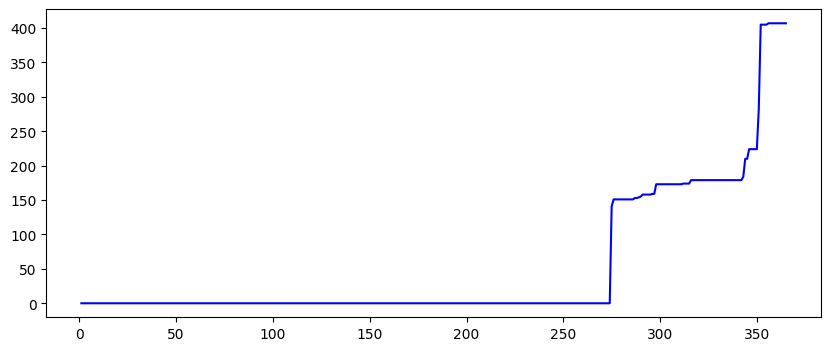

In [5]:
# specifying figure size
fig = plt.figure(figsize=(10, 4))
 
# adding sub plots
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(np.arange(1,len(x)+1,1), np.cumsum(x), color="blue")